In [1]:
import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng #-- define convenient nickname
%matplotlib inline

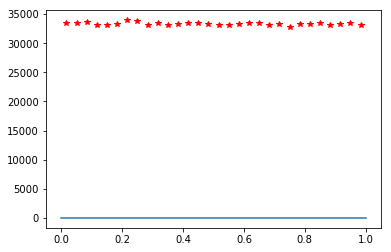

In [2]:
Nsamples = 1000000
x = rng(Nsamples) #**
mycounts, mybins = np.histogram(x,30)
dx = mybins[1] - mybins[0]
bincenters = mybins[0:-1] + dx/2 # discard the last edge, shift others
plt.figure()
plt.plot(bincenters, mycounts, '*r')
plt.plot([mybins[0],mybins[-1]],[1,1])
plt.show()
#plt.ylim([0,1.1])

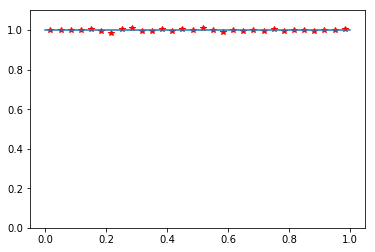

In [3]:
Nsamples = 1000000
x = rng(Nsamples) #**
mycounts, mybins = np.histogram(x,30)
dx = mybins[1] - mybins[0]
bincenters = mybins[0:-1] + dx/2 # discard the last edge, shift others
plt.figure()
plt.plot(bincenters, mycounts/(Nsamples*dx), '*r')
plt.plot([mybins[0],mybins[-1]],[1,1])
plt.ylim([0,1.1])
plt.show()

## Mathematial Intuition
Knowing that x is uniformly distributed from 0 to 1, we know that $\rho_x(x) = 1$

$\rho_y(y) = \dfrac{\rho_x}{\frac{d}{dx}y} = \dfrac{1}{\frac{d}{dx}y}$

$\frac{d}{dx}y = \pi sec^2(\pi(x-\frac{1}{2}))$

Using trigonometric identities, we can sub in tan for sec using $sec^2x=1+tan^2x$

This makes $\frac{d}{dx}y = \pi (1+ tan^2(\pi(x-\frac{1}{2}))) = \pi (1+y^2)$

This means  $\rho_y(y) = \dfrac{1} {\pi(1+ y^2)}$

In our form of the Cauchy as $\dfrac{A}{1+Bx^2}$, we have $A=\dfrac{1}{\pi}$ and $B=1$


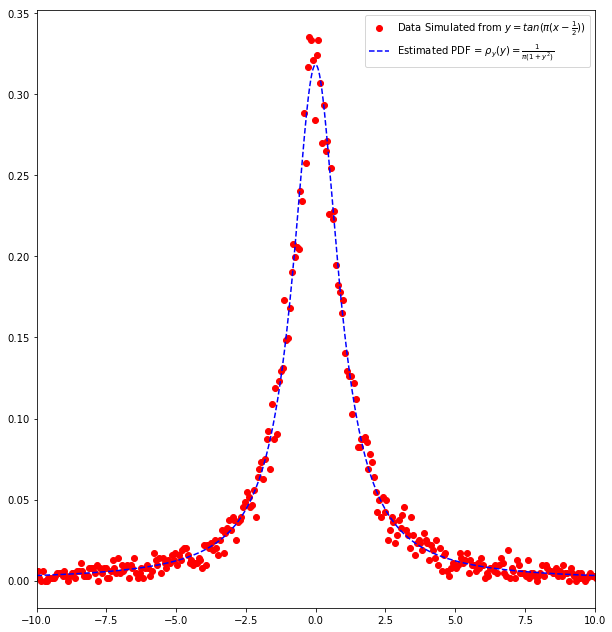

In [169]:
def cauchy(A, B, x):
    return A/(1+B*(x**2))
Nsamples = 10000
x = np.tan(np.pi*(rng(Nsamples)-.5))
x = x[np.abs(x)<100]
mycounts, mybins = np.histogram(x,3000)
dx = mybins[1] - mybins[0]
bincenters = mybins[0:-1] + dx/2 # discard the last edge, shift others
plt.figure(figsize=(10,11))
plt.plot(bincenters, mycounts/(Nsamples*dx), 'ro')
A = 1/np.pi
B = 1
lin_x = np.linspace(min(bincenters), max(bincenters), 100000)
plt.xlim([-10, 10])
plt.plot(lin_x, cauchy(A,B,lin_x), 'b--')
plt.legend([r'Data Simulated from $y=tan(\pi (x-\frac{1}{2}))$', r'Estimated PDF = $\rho_y(y) = \frac{1}{\pi(1+y^2)}$'])
plt.show()


In [19]:
A

0.001